# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

1 5
6

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

15 98
113


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

5
2 5 7 6 12
84


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [ ]:
%%writefile max_pairwise_product_stress_test.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
    long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first)
    {
        for (int second = first + 1; second < n; ++second)
        {
            aux_product =  (long long) numbers[first] * numbers[second];

            if ( max_product < aux_product)
            {
				        max_product = aux_product;
            }
        }
    }

    return max_product;
}

long long MaxPairwiseProductRap(const vector<int> & numbers)
{
    int n=numbers.size();

    int max_ind1=-1;
    for(int i=0;i<n;i++)
    {
        if((max_ind1==-1) || (numbers[i]>numbers[max_ind1]))
            max_ind1=i;
    }

    int max_ind2=-1;
    for(int j=0;j<n;j++)
    {
        if((j!=max_ind1) && ((max_ind2==-1) || (numbers[j]>numbers[max_ind2])))
            max_ind2=j;
    }

    return ((long long)(numbers[max_ind1]))*numbers[max_ind2];
}

int main()
{
    int cont=0;
    while(cont!=20)
    {
        int n=2+rand()%(21-2);
        cout<<n<<"\n";
        vector<int> a;
        for(int i=0;i<n;i++)
        {
            a.push_back(rand() % 200001);
        }
        for(int i=0;i<n;i++)
        {
            cout<<a[i]<<' ';
        }
        cout<<"\n";
        long long res1=MaxPairwiseProduct(a);
        long long res2=MaxPairwiseProductRap(a);
        if(res1!=res2)
        {
            cout<<"Incorrecto: "<<res1<<' '<<res2<<"\n";
            cont++;
        }
        else
        {
            cout<<"OK\n";
            cont++;
        }
    }
    return 0;
}

Writing max_pairwise_product_stress_test.cpp


In [ ]:
!g++ max_pairwise_product_stress_test.cpp -o max_pairwise_product_stress_test
!./max_pairwise_product_stress_test

4
126652 84369 28342 138005 
OK
10
81787 152244 113667 35473 197237 83275 164774 114547 87539 104089 
OK
9
175725 87652 49219 5036 192761 101094 147795 64100 17225 
OK
8
63955 163342 100792 108422 170793 27444 119880 126224 
OK
7
156094 8011 171871 69760 170574 169107 80124 
OK
3
10742 94753 166526 
OK
11
197567 54177 160766 2602 174028 61859 150398 38127 6173 198956 102082 
OK
18
99747 10503 67397 127191 57473 120710 146818 13566 55810 118688 10416 153474 14883 90540 88820 25626 112382 182435 
OK
2
109949 163702 
OK
15
112551 137729 86885 190038 102945 93059 188993 5026 189663 88740 142619 184149 143020 91 31948 
OK
7
140748 87758 135615 78253 41231 150499 95882 
OK
15
103214 8264 166665 167475 118213 57455 192502 157853 122273 6475 147891 25217 26623 136883 157333 
OK
13
152712 99952 127524 95732 27132 86561 112659 94969 101409 175363 173222 69729 52950 
OK
6
53959 156164 4457 20624 50728 122670 
OK
17
43229 7611 127442 49704 155502 152659 76328 19474 109992 146793 99275 137033 1405 

### Test 4  time test  measure the execution time running with the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m8.647s
user	2m8.014s
sys	0m0.024s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);          //1
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Overwriting test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Overwriting max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile max_pairwise_product_efficient.cpp
#include <iostream>
#include <vector>

using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProductFast(const vector<int> & numbers)                             //N inst exec by line executed
{
    int n=numbers.size();                                                                 //1
 
    int max_index1=-1;                                                                    //1
    for(int i=0;i<n;i++)                                                                  //1+2n
    {
        if((max_index1==-1) || (numbers[i]>numbers[max_index1]))                          //n
            max_index1=i;                                                                 //[1,n]
    }
     
    int max_index2=-1;                                                                    //1
    for(int j=0;j<n;j++)                                                                  //1+2n
    {
        if((j!=max_index1) && ((max_index2==-1) || (numbers[j]>numbers[max_index2])))     //n
            max_index2=j;                                                                 //[1,n]
    }
    
    return ((long long)(numbers[max_index1]))*numbers[max_index2];                        //5+6n+[2,2n]
}

int main()
{
    int n;                                                                                //1
    cin>>n;                                                                               //1
    vector<int> numbers(n);                                                               //n
    for(int i=0;i<n;i++)                                                                  //1+2n
    {
        cin>>numbers[i];                                                                  //n
    }

    long long result=MaxPairwiseProductFast(vector<int>(numbers));                        //1+(5+6n+[2,2n])
    cout<<result<<"\n";                                                                   //1
    return 0;                                                                             //TOTAL: 10+10n+[2,2n]
}

Writing max_pairwise_product_efficient.cpp


####Test with inputs 1 and 2



In [ ]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input1.txt

90

real	0m0.003s
user	0m0.002s
sys	0m0.001s


In [ ]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input2.txt

40000000000

real	0m0.003s
user	0m0.001s
sys	0m0.002s


####Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input3.txt

39999800000

real	0m0.063s
user	0m0.060s
sys	0m0.001s


####20 stress tests

In [ ]:
%%writefile max_pairwise_product_stress_test_efficient.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
    long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first)
    {
        for (int second = first + 1; second < n; ++second)
        {
            aux_product =  (long long) numbers[first] * numbers[second];

            if ( max_product < aux_product)
            {
				        max_product = aux_product;
            }
        }
    }

    return max_product;
}

long long MaxPairwiseProductRap(const vector<int> & numbers)
{
    int n=numbers.size();

    int max_ind1=-1;
    for(int i=0;i<n;i++)
    {
        if((max_ind1==-1) || (numbers[i]>numbers[max_ind1]))
            max_ind1=i;
    }

    int max_ind2=-1;
    for(int j=0;j<n;j++)
    {
        if((j!=max_ind1) && ((max_ind2==-1) || (numbers[j]>numbers[max_ind2])))
            max_ind2=j;
    }

    return ((long long)(numbers[max_ind1]))*numbers[max_ind2];
}

int main()
{
    int cont=0;
    while(cont!=20)
    {
        int n=2+rand()%(21-2);
        cout<<n<<"\n";
        vector<int> a;
        for(int i=0;i<n;i++)
        {
            a.push_back(rand() % 200001);
        }
        for(int i=0;i<n;i++)
        {
            cout<<a[i]<<' ';
        }
        cout<<"\n";
        long long res1=MaxPairwiseProduct(a);
        long long res2=MaxPairwiseProductRap(a);
        if(res1!=res2)
        {
            cout<<"Incorrecto: "<<res1<<' '<<res2<<"\n";
            cont++;
        }
        else
        {
            cout<<"OK\n";
            cont++;
        }
    }
    return 0;
}

Writing max_pairwise_product_stress_test_efficient.cpp


In [ ]:
!g++ max_pairwise_product_stress_test_efficient.cpp -o max_pairwise_product_stress_test_efficient
!./max_pairwise_product_stress_test_efficient

4
126652 84369 28342 138005 
OK
10
81787 152244 113667 35473 197237 83275 164774 114547 87539 104089 
OK
9
175725 87652 49219 5036 192761 101094 147795 64100 17225 
OK
8
63955 163342 100792 108422 170793 27444 119880 126224 
OK
7
156094 8011 171871 69760 170574 169107 80124 
OK
3
10742 94753 166526 
OK
11
197567 54177 160766 2602 174028 61859 150398 38127 6173 198956 102082 
OK
18
99747 10503 67397 127191 57473 120710 146818 13566 55810 118688 10416 153474 14883 90540 88820 25626 112382 182435 
OK
2
109949 163702 
OK
15
112551 137729 86885 190038 102945 93059 188993 5026 189663 88740 142619 184149 143020 91 31948 
OK
7
140748 87758 135615 78253 41231 150499 95882 
OK
15
103214 8264 166665 167475 118213 57455 192502 157853 122273 6475 147891 25217 26623 136883 157333 
OK
13
152712 99952 127524 95732 27132 86561 112659 94969 101409 175363 173222 69729 52950 
OK
6
53959 156164 4457 20624 50728 122670 
OK
17
43229 7611 127442 49704 155502 152659 76328 19474 109992 146793 99275 137033 1405 

####Count executed instructions in code and verify with inputs 1,2 and 3


In [ ]:
%%writefile max_pairwise_product_efficient_cont.cpp
#include <iostream>
#include <vector>

using std::vector;
using std::cin;
using std::cout;

long long cont=0LL;

long long MaxPairwiseProductFast(const vector<int> & numbers)                             //N inst exec by line executed
{
    long long cond=0LL;
    int n=numbers.size();                                                                 //1
    cont++;
    int max_index1=-1;                                                                    //1
    cont++;
    cont++;
    for(int i=0;i<n;i++)                                                                  //1+2n    
    {
        cont+=2;
        cont+=2;
        if((max_index1==-1) || (numbers[i]>numbers[max_index1]))                          //2n
        {
            cond++;
            max_index1=i;                                                                 //[1,n]
            cont++;
        }
    }
    cout<<cond<<"\n";
    cond=0LL;
    int max_index2=-1;                                                                    //1
    cont++;
    cont++;
    for(int j=0;j<n;j++)                                                                  //1+2n
    {
        cont+=2;
        cont+=3;
        if((j!=max_index1) && ((max_index2==-1) || (numbers[j]>numbers[max_index2])))     //3n
        {
            cond++;
            max_index2=j;                                                                 //[1,n]
            cont++;
        }
    }
    cout<<cond<<"\n";    
    return ((long long)(numbers[max_index1]))*numbers[max_index2];                        //5+9n+[2,2n]
}

int main()
{
    int n;                                                                                //1
    cont++;
    cin>>n;                                                                               //1
    cont++;
    vector<int> numbers(n);                                                               //n
    cont+=n;
    cont++;
    for(int i=0;i<n;i++)                                                                  //1+2n
    {
        cont+=2;
        cin>>numbers[i];                                                                  //n
        cont++;
    }
    cont++;
    long long result=MaxPairwiseProductFast(vector<int>(numbers));                        //1+(5+6n+[2,2n])
    cont++;
    cout<<result<<"\n";                                                                   //1    
    cout<<cont<<"\n";
    return 0;                                                                             //TOTAL: 10+13n+[2,2n]
}

Overwriting max_pairwise_product_efficient_cont.cpp


In [ ]:
!g++ max_pairwise_product_efficient_cont.cpp -o max_pairwise_product_efficient_cont
!time ./max_pairwise_product_efficient_cont < input1.txt

10
9
90
159

real	0m0.004s
user	0m0.002s
sys	0m0.002s


For input 1:

$I=10+13n+[2,2n]$

$I=10+13(10)+[19]=159$

In [ ]:
!g++ max_pairwise_product_efficient_cont.cpp -o max_pairwise_product_efficient_cont
!time ./max_pairwise_product_efficient_cont < input2.txt

3
4
40000000000
95

real	0m0.003s
user	0m0.002s
sys	0m0.001s


For input 2:

$I=10+13n+[2,2n]$

$I=10+13(6)+[7]=95$

In [ ]:
!g++ max_pairwise_product_efficient_cont.cpp -o max_pairwise_product_efficient_cont
!time ./max_pairwise_product_efficient_cont < input3.txt

200000
199999
39999800000
3000009

real	0m0.062s
user	0m0.057s
sys	0m0.004s


For input 3:

$I=10+13n+[2,2n]$

$I=10+13(200000)+[399999]=3000009$

#####Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

0.057/3000009

1.8999943000171e-08

In [ ]:
# Estimated number of instructions by second

1/(0.057/3000009)

52631736.84210526

### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [ ]:
%%writefile max_pairwise_product_super_efficient.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

int main() {
    
    long long n;                                                                //1
    long long lec;                                                              //1                                                                        
    long long max1 = -1;                                                        //1
    long long max2 = -1;                                                        //1
    cin >> n;                                                                   //1

    for (int i = 0; i < n; ++i)                                                 //1 + 2n
    {
        cin >> lec;                                                             //n

        if (max1 == -1)                                                         //n
        {
            max1 = lec;                                                         //1
        }        
        else if (lec > max1)                                                    //n   
        {       
            max2 = max1;                                                        //[0, n]
            max1 = lec;                                                         //[0, n]                                                                                
        }        
        else if ((max2 == -1) || (lec > max2))                                  //2n
        {
            max2 = lec;                                                         //[0, n]
        }        
    }
    cout << (long long) max1*max2 << "\n";                                      //1
    return 0;                                                                  
                                                                                //TOTAL: 8 + 7n + [0, 3n]    
}

Overwriting max_pairwise_product_super_efficient.cpp


####Test with inputs 1 and 2


 

In [ ]:
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input1.txt

90

real	0m0.004s
user	0m0.001s
sys	0m0.003s


In [ ]:
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input2.txt

40000000000

real	0m0.003s
user	0m0.000s
sys	0m0.003s


####Test and time it with input 3

In [ ]:
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input3.txt

39999800000

real	0m0.057s
user	0m0.057s
sys	0m0.000s


####20 stress tests 

In [ ]:
%%writefile max_pairwise_product_stress_test_super_efficient.cpp
#include <cstdlib>
#include <iostream>
#include <vector>

using std::vector;
using std::cin;
using std::cout;

long long MaxPairwiseProductRap(const vector<int> & numbers)
{
    int n=numbers.size();

    int max_ind1=-1;
    for(int i=0;i<n;i++)
    {
        if((max_ind1==-1) || (numbers[i]>numbers[max_ind1]))
            max_ind1=i;
    }

    int max_ind2=-1;
    for(int j=0;j<n;j++)
    {
        if((j!=max_ind1) && ((max_ind2==-1) || (numbers[j]>numbers[max_ind2])))
            max_ind2=j;
    }

    return ((long long)(numbers[max_ind1]))*numbers[max_ind2];
}

int main()
{    
    int cont=0;
    while(cont!=20)
    {                                                                             
        long long lec;                                                                                                                                         
        long long max1 = -1;                                                              
        long long max2 = -1;
     
        int n=2+rand()%(21-2);
        cout<<n<<"\n";
        vector<int> a;
        for(int i=0;i<n;i++)
        {
            lec=rand() % 200001;
            a.push_back(lec);

            if (max1 == -1)                                                        
            {
                max1 = lec;                                                         
            }        
            else if (lec > max1)                                                      
            {       
                max2 = max1;                                                        
                max1 = lec;                                                                                                                                      
            }        
            else if ((max2 == -1) || (lec > max2))                                  
            {
                max2 = lec;                                                         
            }        
        }
        for(int i=0;i<n;i++)
        {
            cout<<a[i]<<' ';
        }
        cout<<"\n";
        long long res1 = MaxPairwiseProductRap(a);
        long long res2 = max1*max2;

        if(res1!=res2)
        {
            cout<<"Incorrecto: "<<res1<<' '<<res2<<"\n";
            cont++;
        }
        else
        {
            cout<<"OK\n";
            cont++;
        }
    }
    return 0;
}

Overwriting max_pairwise_product_stress_test_super_efficient.cpp


In [ ]:
!g++ max_pairwise_product_stress_test_super_efficient.cpp -o max_pairwise_product_stress_test_super_efficient
!./max_pairwise_product_stress_test_super_efficient

4
126652 84369 28342 138005 
OK
10
81787 152244 113667 35473 197237 83275 164774 114547 87539 104089 
OK
9
175725 87652 49219 5036 192761 101094 147795 64100 17225 
OK
8
63955 163342 100792 108422 170793 27444 119880 126224 
OK
7
156094 8011 171871 69760 170574 169107 80124 
OK
3
10742 94753 166526 
OK
11
197567 54177 160766 2602 174028 61859 150398 38127 6173 198956 102082 
OK
18
99747 10503 67397 127191 57473 120710 146818 13566 55810 118688 10416 153474 14883 90540 88820 25626 112382 182435 
OK
2
109949 163702 
OK
15
112551 137729 86885 190038 102945 93059 188993 5026 189663 88740 142619 184149 143020 91 31948 
OK
7
140748 87758 135615 78253 41231 150499 95882 
OK
15
103214 8264 166665 167475 118213 57455 192502 157853 122273 6475 147891 25217 26623 136883 157333 
OK
13
152712 99952 127524 95732 27132 86561 112659 94969 101409 175363 173222 69729 52950 
OK
6
53959 156164 4457 20624 50728 122670 
OK
17
43229 7611 127442 49704 155502 152659 76328 19474 109992 146793 99275 137033 1405 

####Count executed instructions in code and verify with inputs 1,2 and 3

In [ ]:
%%writefile max_pairwise_product_super_efficient_cont.cpp

#include <cstdlib>
#include <iostream>
#include <vector>

using namespace std;

long long cont=0LL;

int main() {
    
    long long cond=0LL;

    long long n;                                                                //1
    cont++;
    long long lec;                                                              //1     
    cont++;                                                                   
    long long max1 = -1;                                                        //1
    cont++;
    long long max2 = -1;                                                        //1
    cont++;
    cin >> n;                                                                   //1
    cont++;

    cont++;  
    for (int i = 0; i < n; ++i)                                                 //1 + 2n
    {
        cont+=2;
        cin >> lec;                                                             //n
        cont++;
        cont++;
        if (max1 == -1)                                                         //n
        {
            max1 = lec;                                                         //1
            cont++;
        }        
        else if (lec > max1)                                                    //[0,n]   
        {       
            cont+=3;
            cond+=3;
            max2 = max1;                                                        //[0, n]
            max1 = lec;                                                         //[0, n]                                                                                
        }      
        else if ((max2 == -1) || (lec > max2))                                  //[0,2n]
        {
            cont+=3; 
            cond+=3;
            max2 = lec;                                                         //[0, n]
        }        
    }
    cont++; 
    cout << (long long) max1*max2 << "\n";                                      //1
    cout<<cond<<"\n";
    cout<<cont<<"\n";
    return 0;                                                                  
                                                                                //TOTAL: 8 + 4n + [0, 6n]    
}

Overwriting max_pairwise_product_super_efficient_cont.cpp


In [ ]:
!g++ max_pairwise_product_super_efficient_cont.cpp -o max_pairwise_product_super_efficient_cont
!time ./max_pairwise_product_super_efficient_cont < input1.txt

90
27
75

real	0m0.004s
user	0m0.001s
sys	0m0.003s


For input 1:

$I=8+4n+[0,6n]$

$I=8+4(10)+[27]=75$

In [ ]:
!g++ max_pairwise_product_super_efficient_cont.cpp -o max_pairwise_product_super_efficient_cont
!time ./max_pairwise_product_super_efficient_cont < input2.txt

40000000000
12
44

real	0m0.003s
user	0m0.001s
sys	0m0.002s


For input 2:

$I=8+4n+[0,6n]$

$I=8+4(6)+[12]=44$

In [ ]:
!g++ max_pairwise_product_super_efficient_cont.cpp -o max_pairwise_product_super_efficient_cont
!time ./max_pairwise_product_super_efficient_cont < input3.txt

39999800000
599997
1400005

real	0m0.071s
user	0m0.063s
sys	0m0.004s


For input 3:

$I=8+4n+[0,6n]$

$I=8+4(200000)+[599997]=1400005$

#####Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

0.063/1400005

4.4999839286288266e-08

In [ ]:
# Estimated number of instructions by second

1/(0.063/1400005)

22222301.587301586

## Python

In [ ]:
%%writefile product.py
def max_pairwise_product2 (numbers):
    max_ind1=-1
    n=len(numbers)
    for x in range(n):
        if((max_ind1==-1)or(numbers[x]>numbers[max_ind1])):
            max_ind1=x
    max_ind2=-1
    for y in range(n):
        if((y!=max_ind1)and((max_ind2==-1)or(numbers[y]>numbers[max_ind2]))):
            max_ind2=y
    return numbers[max_ind1]*numbers[max_ind2]


if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product2(input_numbers))

Writing product.py


In [ ]:
%%time
!python product.py  

5
1 3 200000 9 200000 23
40000000000
CPU times: user 61.5 ms, sys: 16.7 ms, total: 78.1 ms
Wall time: 6.55 s


In [ ]:
%%writefile product2.py
def max_pairwise_product2 (numbers):
    max_ind1=-1
    n=len(numbers)
    for x in range(n):
        if((max_ind1==-1)or(numbers[x]>numbers[max_ind1])):
            max_ind1=x
    max_ind2=-1
    for y in range(n):
        if((y!=max_ind1)and((max_ind2==-1)or(numbers[y]>numbers[max_ind2]))):
            max_ind2=y
    return numbers[max_ind1]*numbers[max_ind2]



if __name__ == '__main__':
    input_n = int(input())
    input_numbers = [int(x) for x in input().split()]
    print(max_pairwise_product2(input_numbers))

Overwriting product2.py


In [ ]:
%%time
!python product2.py

5
1 3 200000 9 200000 23
40000000000
CPU times: user 48.9 ms, sys: 15.6 ms, total: 64.5 ms
Wall time: 4.75 s


# Screenhsoots of the Coursera Submissions in C++ and Python

  Sum of Two Digits 

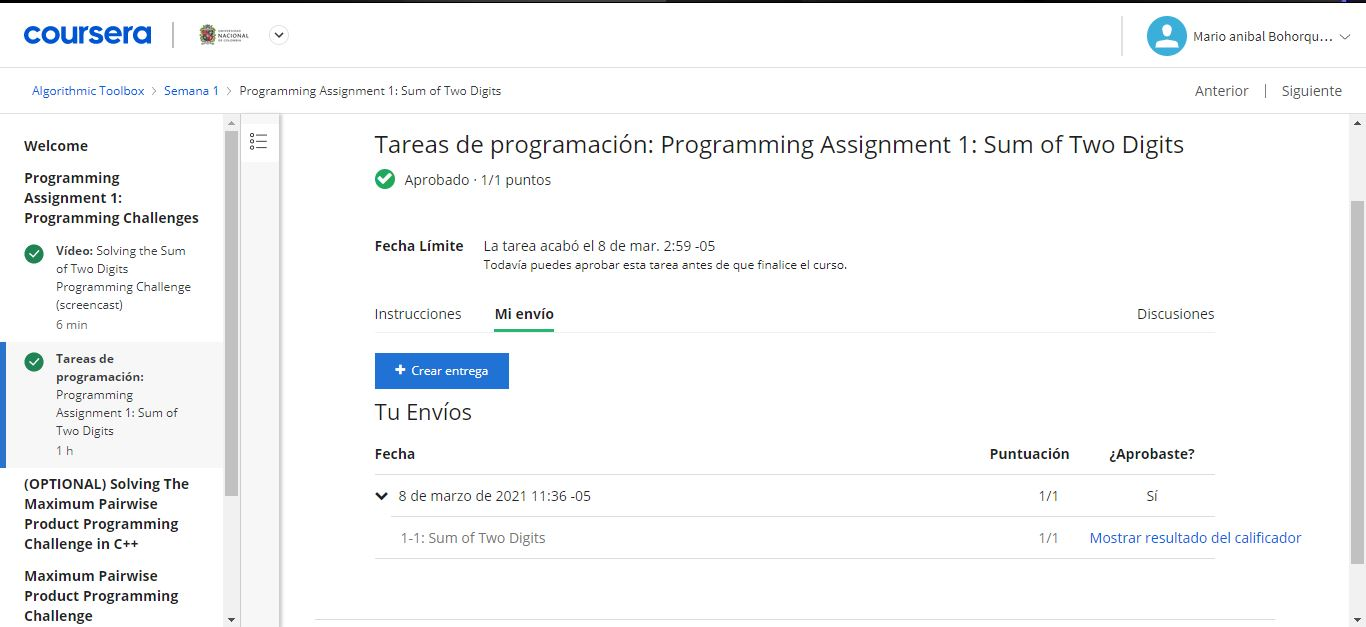

Maximun pairwise product

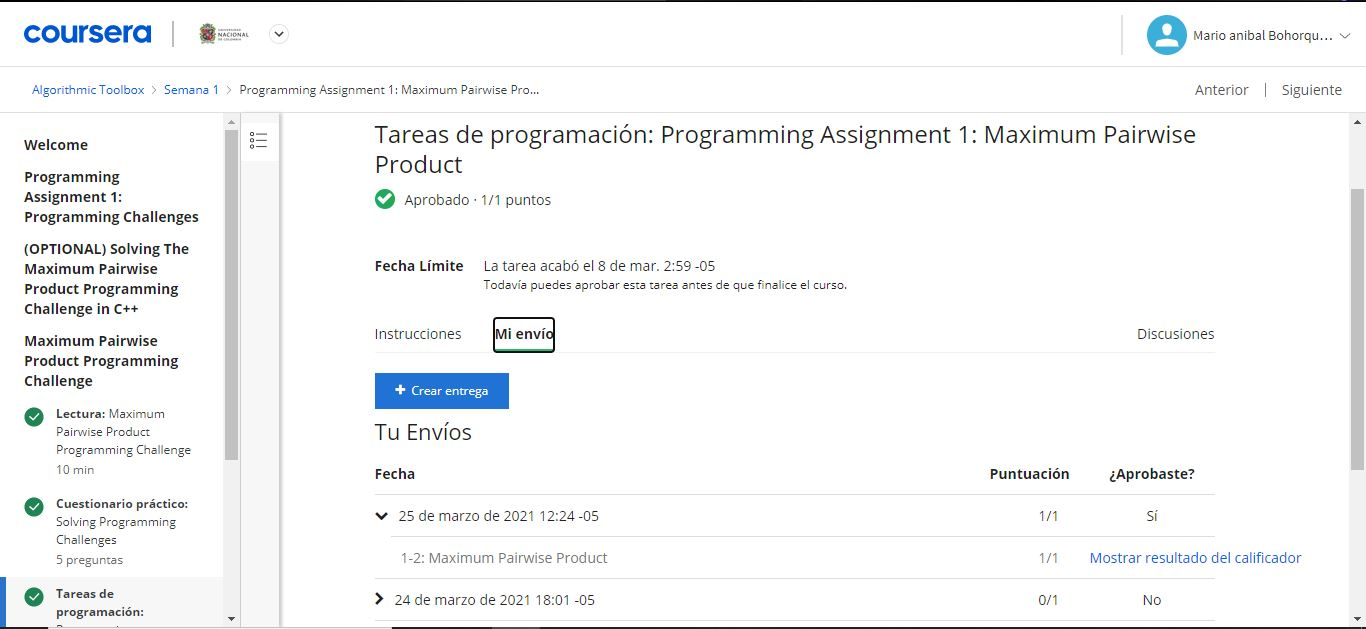